Goal:

Find a pattern in the top influencer's stats

In [183]:
### Data Preprocessing
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv("top_insta_influencers_data.csv")

# Clear non numerical columns channel_info - country
dataframe = dataframe.drop(["channel_info", "country"], axis = 1)

# Individually adjust the necessary columns
for i in range(len(dataframe)):
  
  # Remove % and change the value to an int
  rate = dataframe["60_day_eng_rate"][i]
  dataframe.loc[i, "60_day_eng_rate"] = float(rate[:-1])

  # Change b, m, and k to numerical numbers: billion, million and thousand
  post = dataframe["posts"][i]
  follower = dataframe["followers"][i]
  post_like = dataframe["new_post_avg_like"][i]
  likes = dataframe["total_likes"][i]
  average_likes = dataframe["avg_likes"][i]

  # Adjust posts column
  if post[-1] == "b":  
    dataframe.loc[i, "posts"] = int(float(post[:-1]) * 1000000000)
  elif post[-1] == "m":
     dataframe.loc[i, "posts"] = int(float(post[:-1]) * 1000000)
  elif post[-1] == "k":
     dataframe.loc[i, "posts"] = int(float(post[:-1]) * 1000)
  
  # Adjust followers column
  if follower[-1] == "b":  
    dataframe.loc[i, "followers"] = int(float(follower[:-1]) * 1000000000)
  elif follower[-1] == "m":
     dataframe.loc[i, "followers"] = int(float(follower[:-1]) * 1000000)
  elif follower[-1] == "k":
     dataframe.loc[i, "followers"] = int(float(follower[:-1]) * 1000)
  
  # Adjust new post avg like column
  if post_like[-1] == "b":  
    dataframe.loc[i, "new_post_avg_like"] = int(float(post_like[:-1]) * 1000000000)
  elif post_like[-1] == "m":
     dataframe.loc[i, "new_post_avg_like"] = int(float(post_like[:-1]) * 1000000)
  elif post_like[-1] == "k":
     dataframe.loc[i, "new_post_avg_like"] = int(float(post_like[:-1]) * 1000)
  
  # Adjust total likes column 
  if likes[-1] == "b":  
    dataframe.loc[i, "total_likes"] = int(float(likes[:-1]) * 1000000000)
  elif likes[-1] == "m":
     dataframe.loc[i, "total_likes"] = int(float(likes[:-1]) * 1000000)
  elif likes[-1] == "k":
     dataframe.loc[i, "total_likes"] = int(float(likes[:-1]) * 1000)

  # Adjust average likes column 
  if average_likes[-1] == "b":  
    dataframe.loc[i, "avg_likes"] = int(float(average_likes[:-1]) * 1000000000)
  elif average_likes[-1] == "m":
     dataframe.loc[i, "avg_likes"] = int(float(average_likes[:-1]) * 1000000)
  elif average_likes[-1] == "k":
     dataframe.loc[i, "avg_likes"] = int(float(average_likes[:-1]) * 1000)

# Change the order of the ranking column. I want the number one influencer to be biased as better than the others
for i in range(len(dataframe)):
   rank = dataframe["rank"][i]
   dataframe.loc[i, "rank"] = len(dataframe) - i # Give rank number 1 the value 199, rank number 2 the value 198 ...

features = dataframe.values # no feature scaling
dataframe

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
0,199,92,3300,475800000,8700000,1.39,6500000,29000000000
1,198,91,6900,366200000,8300000,1.62,5900000,57400000000
2,197,90,890,357300000,6800000,1.24,4400000,6000000000
3,196,93,1800,342700000,6200000,0.97,3300000,11500000000
4,195,91,6800,334100000,1900000,0.2,665300,12500000000
...,...,...,...,...,...,...,...,...
194,5,71,2300,33200000,623800,1.4,464700,1400000000
195,4,81,3800,33200000,390400,0.64,208000,1500000000
196,3,79,770,33200000,193300,0.26,82600,149200000
197,2,78,2300,33000000,719600,1.42,467700,1700000000


In [184]:
### Define Helper Functions:
from sklearn.cluster import KMeans

# Calculate the wcss and show elbow curve
def calculate_wcss(new_features):
  wcss = []
  for i in range(1, 11):
    kmeans = KMeans( n_clusters = i, init = "k-means++", )
    kmeans.fit(new_features)
    wcss.append(kmeans.inertia_) # wcss

  # visualize the results to use the elbow method
  plt.figure(figsize = (15,2))
  plt.plot(range(1,11), wcss)
  plt.title("Elbow Method")
  plt.xlabel("Number of clusters")
  plt.ylabel("WCSS")
  plt.show()


# Plot the graph after creating the new KMeans
def plot_graph(plt, range_number, x_axis_column_number, y_axis_column_number, colors_list, x_label, y_label, new_label, kmeans_clusterer):

  plt.figure(figsize = (15,4))
  for i in range(range_number):
    # choose the rows where KMeans = i - column = 2 [posts] - column = 1 [influence score]
    plt.scatter(features[new_label == i, x_axis_column_number], features[new_label == i, y_axis_column_number], c = colors_list[i], s = 20, label = f"Cluster {i}")

  plt.scatter( kmeans_clusterer.cluster_centers_[:, x_axis_column_number], kmeans_clusterer.cluster_centers_[:, y_axis_column_number], s = 100, c = 'yellow', label = "Centroids")
  plt.title("Clusters")
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.legend()
  plt.show()


# This list is used in plotting the curves and clusters
colors = ['blue', 'red', 'orange', 'purple', 'black']

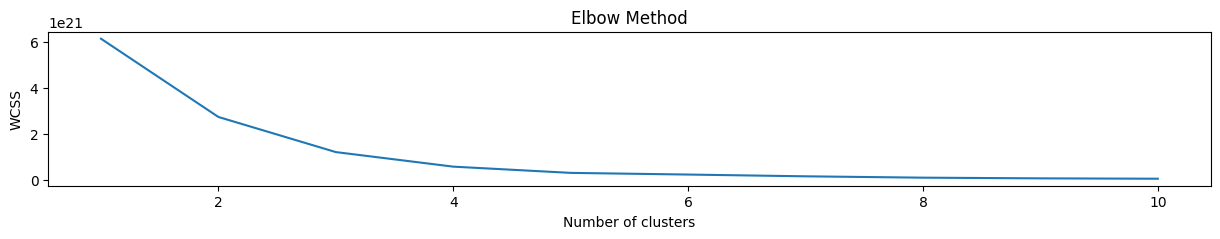

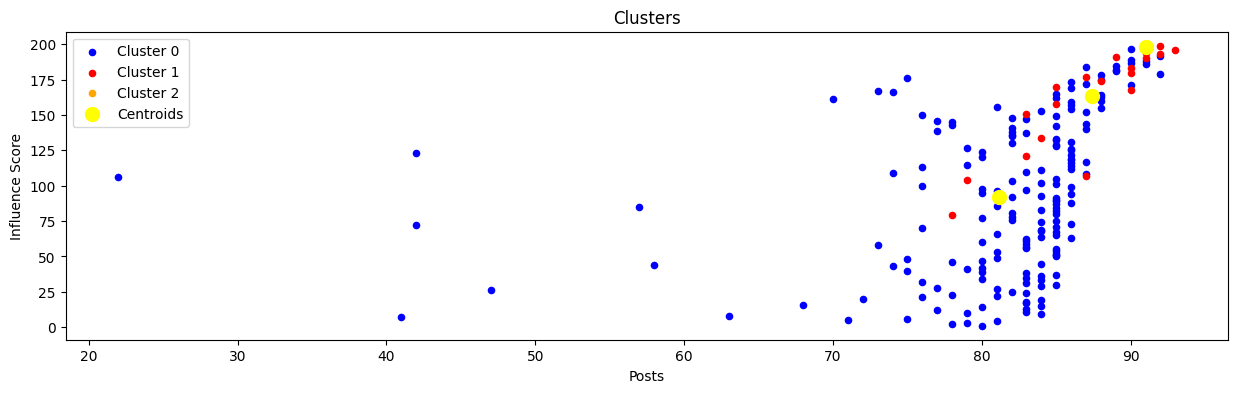

In [185]:
### Build KMeans when training it on all the features

# Plot ekbow curve
calculate_wcss(features)

# Build the KMeans model
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
class_label = kmeans.fit_predict(features)

# Influence vs Posts
plot_graph(plt = plt, range_number = 3, x_axis_column_number = 1, y_axis_column_number = 0, colors_list = colors, x_label = "Posts", y_label = "Influence Score", new_label = class_label, kmeans_clusterer = kmeans)

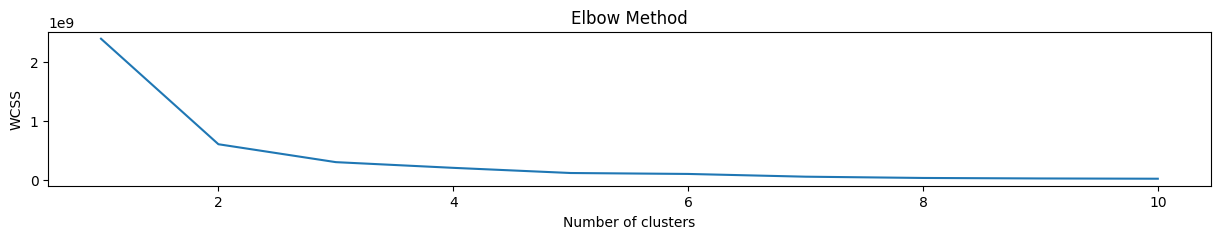

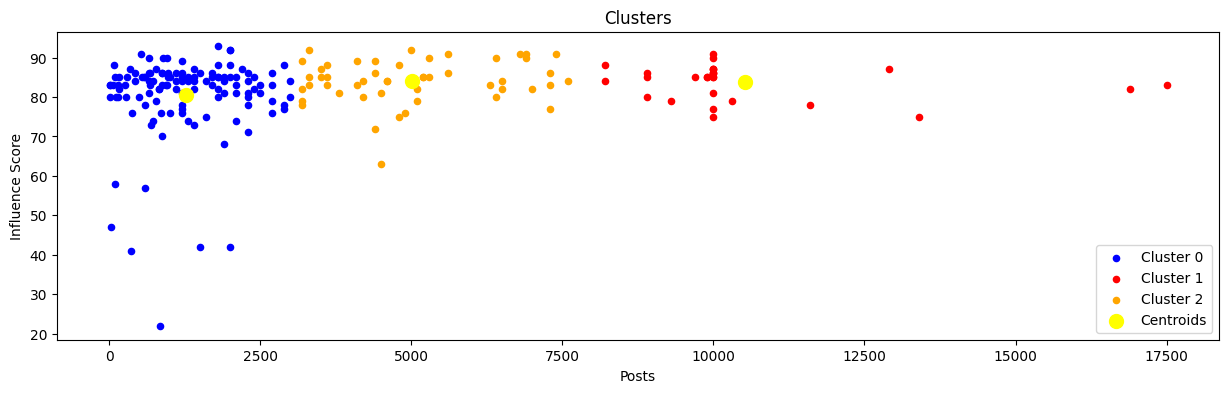

In [186]:
### Build KMeans when training it on only the 2 features: Influence score and posts
features = dataframe.iloc[:, [1, 2]].values

# Plot elbow curve
calculate_wcss(features)

# Build the KMeans model
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
class_label = kmeans.fit_predict(features)

# Influence vs Posts
plot_graph(plt = plt, range_number = 3, x_axis_column_number = 1, y_axis_column_number = 0, colors_list = colors, x_label = "Posts", y_label = "Influence Score", new_label = class_label, kmeans_clusterer = kmeans)

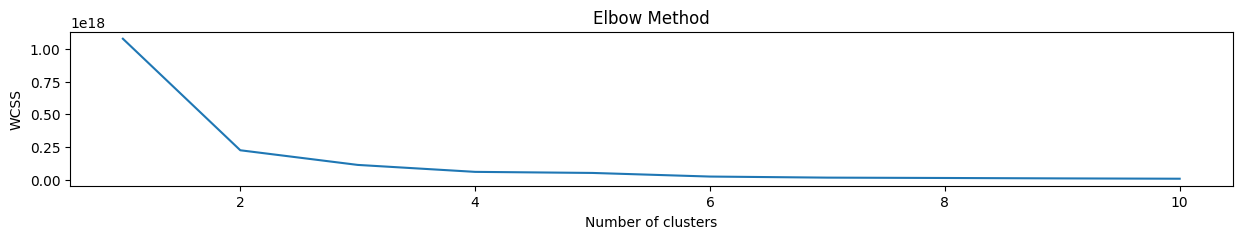

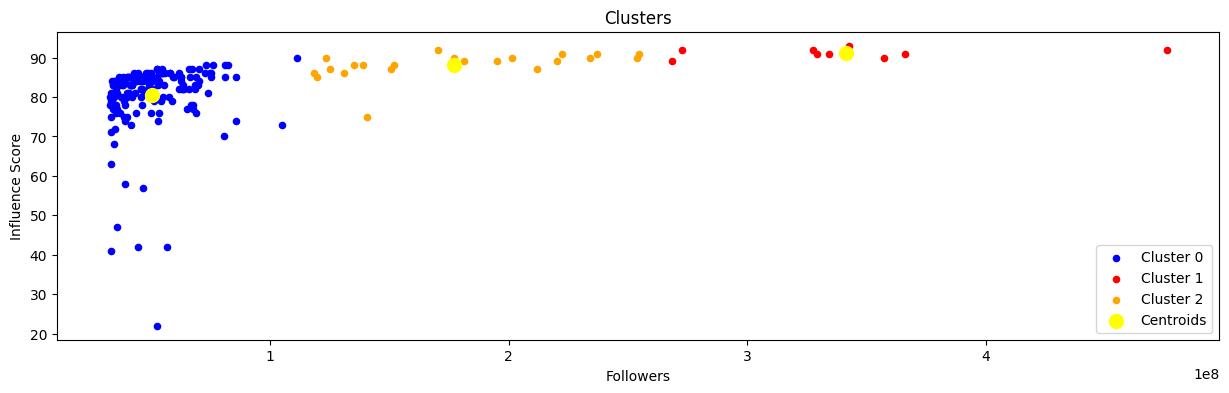

In [187]:
### Build KMeans when training it on only the 2 features: Influence score and followers
features = dataframe.iloc[:, [1, 3]].values

# Plot elbow curve
calculate_wcss(features)

# Build the KMeans model
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
class_label = kmeans.fit_predict(features)

# Influence vs Posts
plot_graph(plt = plt, range_number = 3, x_axis_column_number = 1, y_axis_column_number = 0, colors_list = colors, x_label = "Followers", y_label = "Influence Score", new_label = class_label, kmeans_clusterer = kmeans)

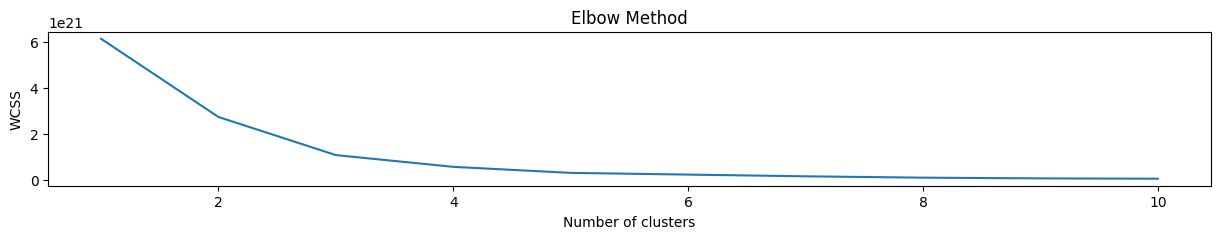

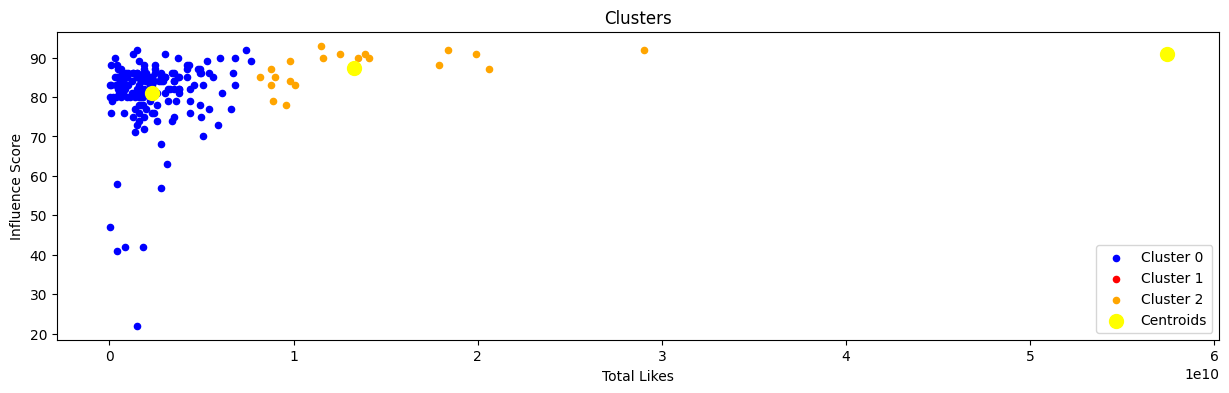

In [188]:
### Build KMeans when training it on only the 2 features: Influence score and total likes
features = dataframe.iloc[:, [1, 7]].values

# Plot elbow curve
calculate_wcss(new_features = features)

# Build the KMeans model
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
class_label = kmeans.fit_predict(features)

# Influence vs Posts
plot_graph(plt = plt, range_number = 3, x_axis_column_number = 1, y_axis_column_number = 0, colors_list = colors, x_label = "Total Likes", y_label = "Influence Score", new_label = class_label, kmeans_clusterer = kmeans)

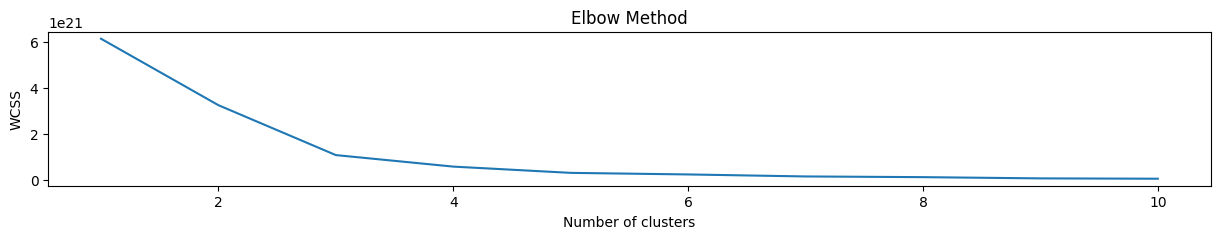

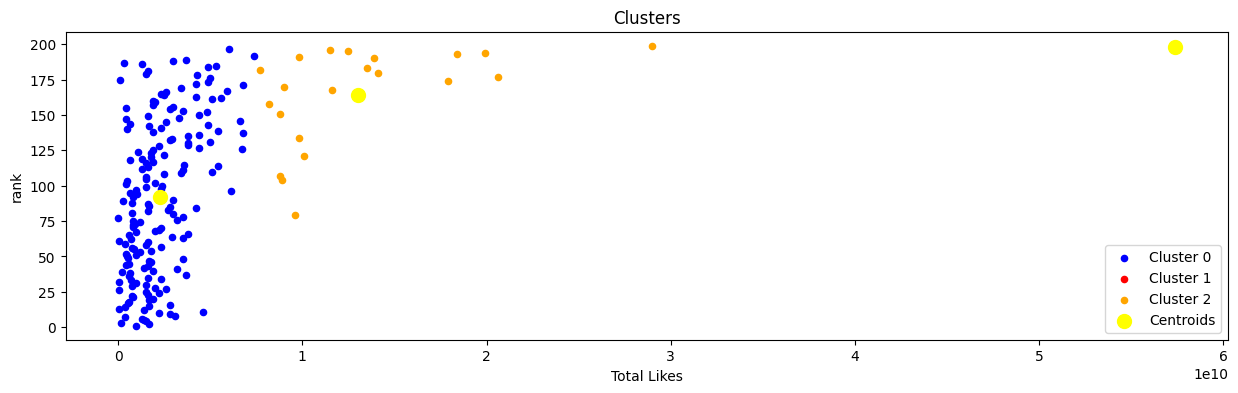

In [189]:
### Build KMeans when training it on only the 2 features: Ranks and total likes
features = dataframe.iloc[:, [0, 7]].values

# Plot elbow curve
calculate_wcss(new_features = features)

# Build the KMeans model
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
class_label = kmeans.fit_predict(features)

# Influence vs Posts
plot_graph(plt = plt, range_number = 3, x_axis_column_number = 1, y_axis_column_number = 0, colors_list = colors, x_label = "Total Likes", y_label = "rank", new_label = class_label, kmeans_clusterer = kmeans)

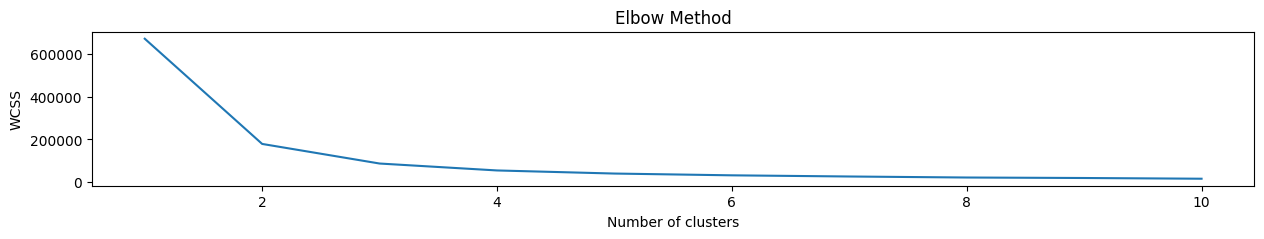

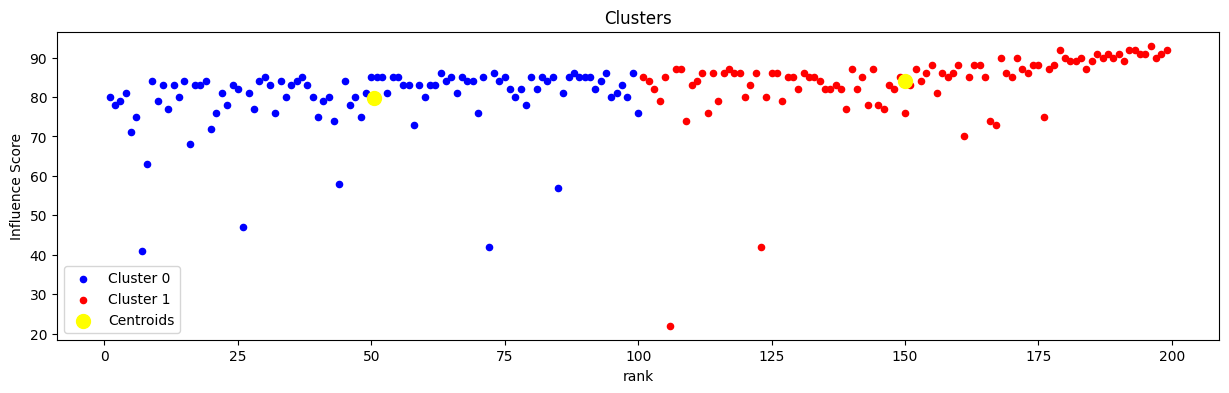

In [190]:
### Build KMeans when training it on only the 2 features: Influence score and total Ranks
# columns = > ['rank', 'influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
features = dataframe.iloc[:, [0, 1]].values

# Plot elbow curve
calculate_wcss(new_features = features)

# Build the KMeans model
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
class_label = kmeans.fit_predict(features)

# Influence vs Posts
plot_graph(plt = plt, range_number = 2, x_axis_column_number = 0, y_axis_column_number = 1, colors_list = colors, x_label = "rank", y_label = "Influence Score", new_label = class_label, kmeans_clusterer = kmeans)

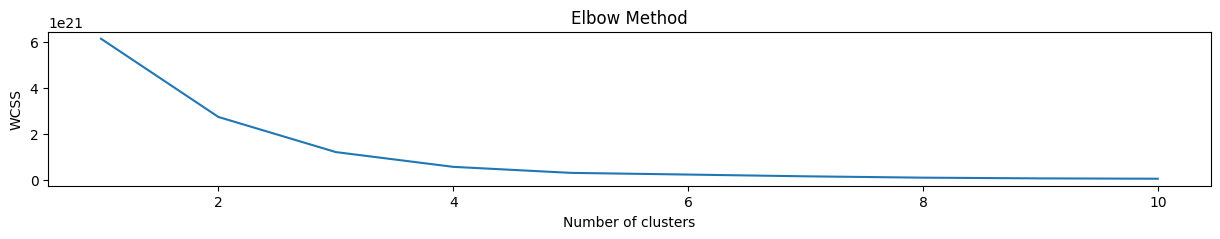

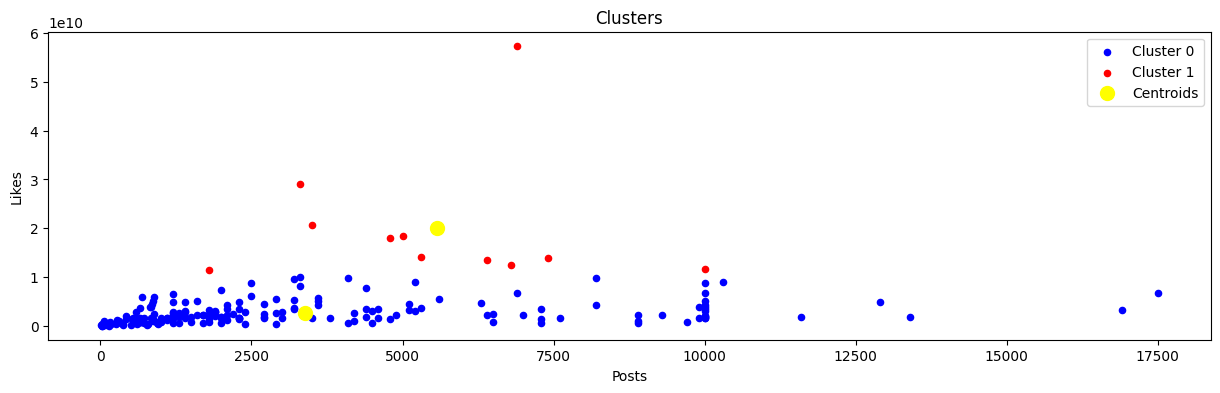

In [191]:
### Build KMeans when training it on only the 2 features: Posts and total likes
# columns = > ['rank', 'influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
features = dataframe.iloc[:, [2, 7]].values

# Plot elbow curve
calculate_wcss(new_features = features)

# Build the KMeans model
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
class_label = kmeans.fit_predict(features)

# Influence vs Posts
plot_graph(plt = plt, range_number = 2, x_axis_column_number = 0, y_axis_column_number = 1, colors_list = colors, x_label = "Posts", y_label = "Likes", new_label = class_label, kmeans_clusterer = kmeans)